In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

1. Read `lesmis.gml` file and use NetworkX to display the corresponding network, suggest appropriate simple labelling of the nodes to maintain the readability of the network graph as clear as possible. Save the adjacency matrix of this graph in a separate file.

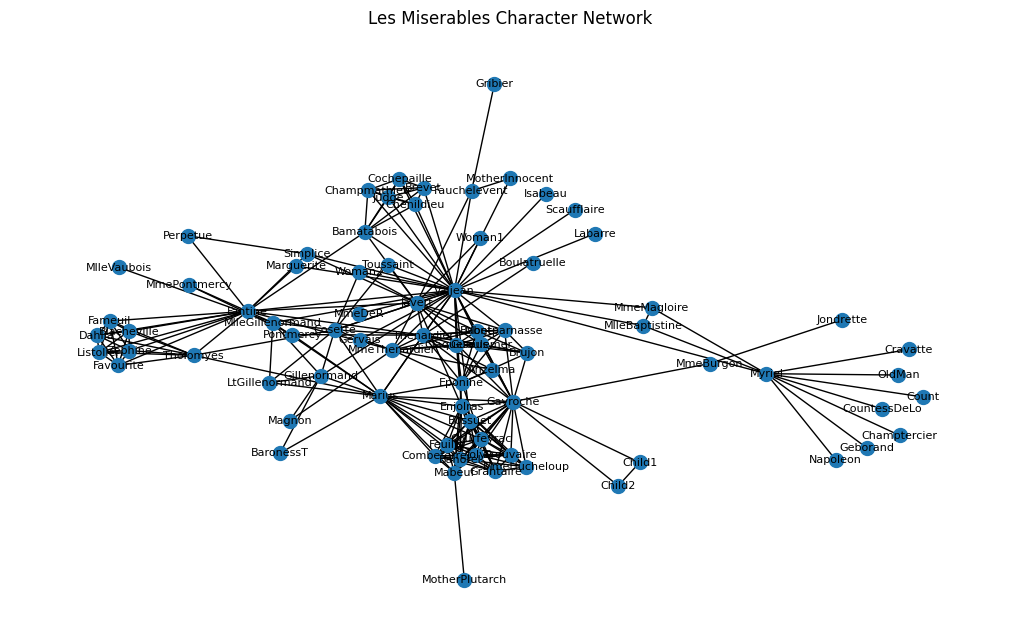

In [14]:
# Load and display the network
G = nx.read_gml("lesmis.gml")
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_size=100, font_size=8)
plt.title("Les Miserables Character Network")
plt.show()

# Save adjacency matrix
adjacency_matrix = nx.to_numpy_array(G)
np.savetxt("adjacency_matrix.txt", adjacency_matrix, fmt='%d')

2.  Write a script that uses NetworkX functions to calculate the diameter, global clustering coefficient, average distance in the graph, smallest and largest component.

In [15]:
diameter = nx.diameter(G)
print(f"Diameter: {diameter}")
global_clustering_coefficient = nx.average_clustering(G)
print(f"Global Clustering Coefficient: {global_clustering_coefficient}")
average_distance = nx.average_shortest_path_length(G)
print(f"Average Distance: {average_distance}")
smallest_component = len(min(nx.connected_components(G), key=len))
print(f"Smallest Component: {smallest_component}")
largest_component = len(max(nx.connected_components(G), key=len))
print(f"Largest Component: {largest_component}")

Diameter: 5
Global Clustering Coefficient: 0.5731367499320135
Average Distance: 2.6411483253588517
Smallest Component: 77
Largest Component: 77


3. Suggest a script that uses NetworkX functions to identify the nodes (characters) of the three highest degree centrality, three highest closeness centrality and three highest betweenness centrality.  

In [16]:
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

degree_top3 = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
closeness_top3 = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
betweenness_top3 = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:3]

print(f"Top 3 Degree Centrality: {degree_top3}")
print(f"Top 3 Closeness Centrality: {closeness_top3}")
print(f"Top 3 Betweenness Centrality: {betweenness_top3}")

Top 3 Degree Centrality: [('Valjean', 0.47368421052631576), ('Gavroche', 0.2894736842105263), ('Marius', 0.25)]
Top 3 Closeness Centrality: [('Valjean', 0.6440677966101694), ('Marius', 0.5314685314685315), ('Thenardier', 0.5170068027210885)]
Top 3 Betweenness Centrality: [('Valjean', 0.5699890527836184), ('Myriel', 0.17684210526315788), ('Gavroche', 0.16511250242584766)]


4. Write a script that plots the degree centrality distribution, closeness centrality distribution and betweenness centrality distribution.

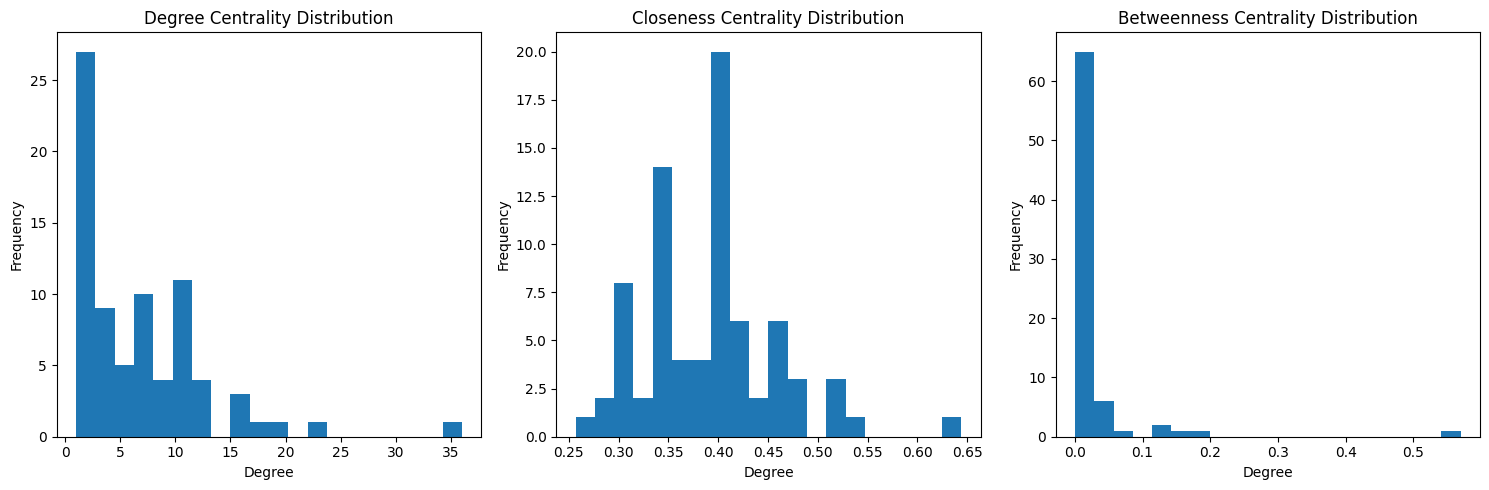

In [17]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
closeness_sequence = list(closeness_centrality.values())
betweenness_sequence = list(betweenness_centrality.values())

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# Plot degree centrality distribution
axs[0].hist(degree_sequence, bins=20)
axs[0].set_title("Degree Centrality Distribution")
axs[0].set_xlabel("Degree")
axs[0].set_ylabel("Frequency")
# Plot closeness centrality distribution
axs[1].hist(closeness_sequence, bins=20)
axs[1].set_title("Closeness Centrality Distribution")
axs[1].set_xlabel("Degree")
axs[1].set_ylabel("Frequency")
# Plot betweenness centrality distribution
axs[2].hist(betweenness_sequence, bins=20)
axs[2].set_title("Betweenness Centrality Distribution")
axs[2].set_xlabel("Degree")
axs[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

5. We want to use exponentially truncated power-law instead of power law distribution.
Suggest a script that quantifies the goodness of fit for degree-centrality, closeness centrality
and betweenness centrality distributions.

In [18]:
import powerlaw

# Function to fit exponentially truncated power-law distribution and calculate p-value
def fit_exp_truncated_power_law(data):
    fit = powerlaw.Fit(data, discrete=True)
    return fit.truncated_power_law.parameter1, fit.truncated_power_law.parameter2, fit.distribution_compare('truncated_power_law', 'exponential')[1]

# Extract centrality values
degree_values = list(degree_centrality.values())
closeness_values = list(closeness_centrality.values())
betweenness_values = list(betweenness_centrality.values())

# Fit exponentially truncated power-law distribution and calculate p-value for each centrality
degree_alpha, degree_lambda, degree_p = fit_exp_truncated_power_law(degree_values)
closeness_alpha, closeness_lambda, closeness_p = fit_exp_truncated_power_law(closeness_values)
betweenness_alpha, betweenness_lambda, betweenness_p = fit_exp_truncated_power_law(betweenness_values)

# Check if p-value is greater than 10% for each centrality
if degree_p > 0.1:
    print("Degree centrality likely follows an exponentially truncated power-law distribution.")
else:
    print("Degree centrality does not follow an exponentially truncated power-law distribution.")

if closeness_p > 0.1:
    print("Closeness centrality likely follows an exponentially truncated power-law distribution.")
else:
    print("Closeness centrality does not follow an exponentially truncated power-law distribution.")

if betweenness_p > 0.1:
    print("Betweenness centrality likely follows an exponentially truncated power-law distribution.")
else:
    print("Betweenness centrality does not follow an exponentially truncated power-law distribution.")

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Degree centrality likely follows an exponentially truncated power-law distribution.
Closeness centrality does not follow an exponentially truncated power-law distribution.
Betweenness centrality does not follow an exponentially truncated power-law distribution.


8. We want to ignore the weighting imposed by the network, and we want to restrict to binary
representation (either weight value 1 if there is cooccurrence of characters, zero otherwise).
Provide the new adjacency matrix and save it in a file.

Binary adjacency matrix saved to binary_adjacency_matrix.txt
Step 2
    Diameter: 5
    Global Clustering Coefficient: 0.5731367499320135
    Average Distance: 2.6411483253588517
    Smallest Component: 77
    Largest Component: 77
Step 3
    Top 3 Degree Centrality: [('Valjean', 0.47368421052631576), ('Gavroche', 0.2894736842105263), ('Marius', 0.25)]
    Top 3 Closeness Centrality: [('Valjean', 0.6440677966101694), ('Marius', 0.5314685314685315), ('Thenardier', 0.5170068027210885)]
    Top 3 Betweenness Centrality: [('Valjean', 0.5699890527836184), ('Myriel', 0.17684210526315788), ('Gavroche', 0.16511250242584766)]
Step 4


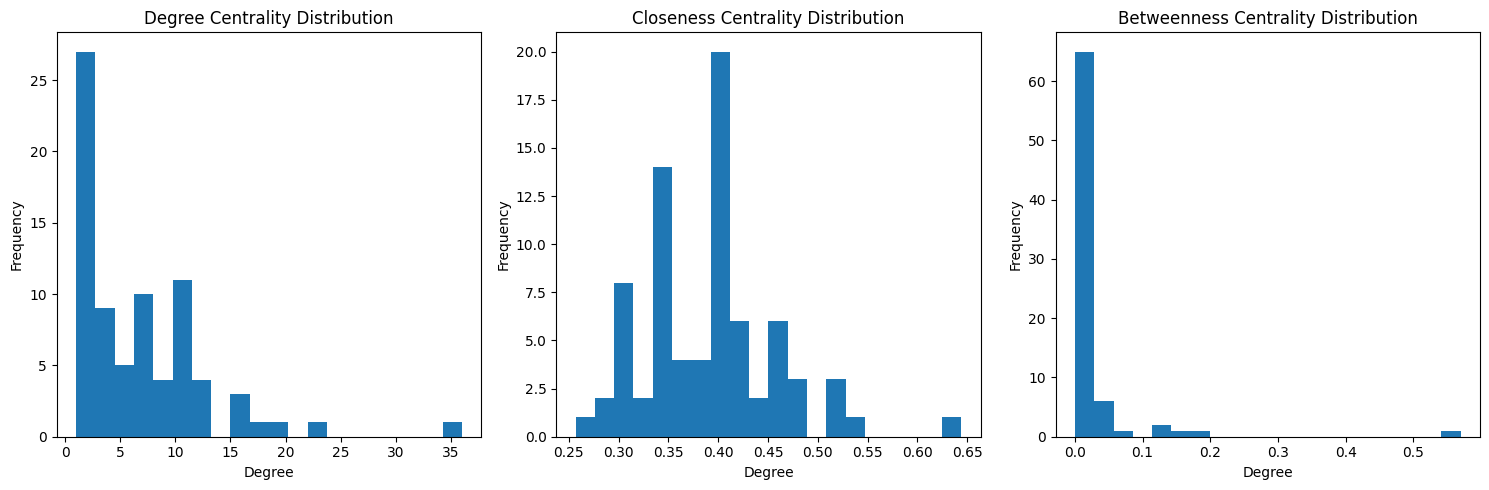

In [24]:
# Create a new graph with binary representation
binary_G = nx.Graph()
binary_G.add_nodes_from(G.nodes())
for u, v, data in G.edges(data=True):
    binary_G.add_edge(u, v, weight=1)  # Set weight to 1 for all edges

# Create the adjacency matrix
adjacency_matrix = nx.adjacency_matrix(binary_G).toarray()

# Save the adjacency matrix to a file
np.savetxt("binary_adjacency_matrix.txt", adjacency_matrix, fmt="%d")

print("Binary adjacency matrix saved to binary_adjacency_matrix.txt")


# Steps 2-7

print("Step 2")
diameter = nx.diameter(binary_G)
print(f"    Diameter: {diameter}")
global_clustering_coefficient = nx.average_clustering(binary_G)
print(f"    Global Clustering Coefficient: {global_clustering_coefficient}")
average_distance = nx.average_shortest_path_length(binary_G)
print(f"    Average Distance: {average_distance}")
smallest_component = len(min(nx.connected_components(binary_G), key=len))
print(f"    Smallest Component: {smallest_component}")
largest_component = len(max(nx.connected_components(binary_G), key=len))
print(f"    Largest Component: {largest_component}")

print("Step 3")

degree_centrality = nx.degree_centrality(binary_G)
closeness_centrality = nx.closeness_centrality(binary_G)
betweenness_centrality = nx.betweenness_centrality(binary_G)

degree_top3 = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
closeness_top3 = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
betweenness_top3 = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:3]

print(f"    Top 3 Degree Centrality: {degree_top3}")
print(f"    Top 3 Closeness Centrality: {closeness_top3}")
print(f"    Top 3 Betweenness Centrality: {betweenness_top3}")

degree_sequence = sorted([d for n, d in binary_G.degree()], reverse=True)
closeness_sequence = list(closeness_centrality.values())
betweenness_sequence = list(betweenness_centrality.values())

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# Plot degree centrality distribution
axs[0].hist(degree_sequence, bins=20)
axs[0].set_title("Degree Centrality Distribution")
axs[0].set_xlabel("Degree")
axs[0].set_ylabel("Frequency")
# Plot closeness centrality distribution
axs[1].hist(closeness_sequence, bins=20)
axs[1].set_title("Closeness Centrality Distribution")
axs[1].set_xlabel("Degree")
axs[1].set_ylabel("Frequency")
# Plot betweenness centrality distribution
axs[2].hist(betweenness_sequence, bins=20)
axs[2].set_title("Betweenness Centrality Distribution")
axs[2].set_xlabel("Degree")
axs[2].set_ylabel("Frequency")

print("Step 4")

plt.tight_layout()
plt.show()
